<a href="https://colab.research.google.com/github/ryanhassell/IDS/blob/main/HW3/Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ryan Hassell

## Part 1 (SQL)

In order to delete rows in which the population was zero, I used the query

```
DELETE FROM life_expectancy WHERE Population = 0;
```



In order to get the number of disinct countries after data cleaning, I used the query

```
SELECT COUNT(DISTINCT Country) AS TotalCountries
FROM life_expectancy;
```



And this is how many were returned:

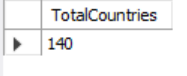

I made this query to list the top 5 countries with the highest mortality rates:

```
SELECT Country
FROM (
    SELECT Country, AVG(Adult_Mortality) AS AvgMortality
    FROM life_expectancy
    WHERE Year BETWEEN 2010 AND 2015
    GROUP BY Country
    ORDER BY AvgMortality DESC
    LIMIT 5
) AS HighestMortality
```



And this is the top 5!
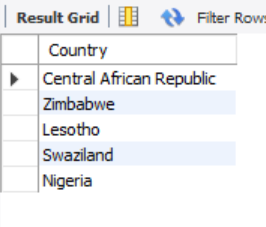

Here's the query I used to get the five lowest mortality rates:

```
SELECT Country
FROM (
    SELECT Country, AVG(Adult_Mortality) AS AvgMortality
    FROM life_expectancy
    WHERE Year BETWEEN 2010 AND 2015
    GROUP BY Country
    ORDER BY AvgMortality ASC
    LIMIT 5
) AS LowestMortality;
```



And here's the table that was returned:

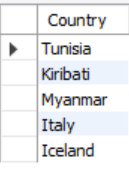

This is the query I used to get the highest population:

```
SELECT Country
FROM (
    SELECT Country, AVG(Population) AS AvgPopulation
    FROM life_expectancy
    WHERE Year BETWEEN 2010 AND 2015
    GROUP BY Country
    ORDER BY AvgPopulation DESC
    LIMIT 5
) AS HighestPopulation
```



And here are the top 5 populous contries:

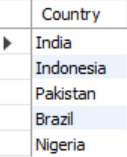

And the query I used to get the 5 lowest populated countries:

```
SELECT Country
FROM (
    SELECT Country, AVG(Population) AS AvgPopulation
    FROM life_expectancy
    WHERE Year BETWEEN 2010 AND 2015
    GROUP BY Country
    ORDER BY AvgPopulation ASC
    LIMIT 5
) AS LowestPopulation;
```



Here's the 5 lowest populated countries:

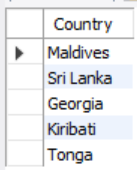

And the query for top 5 GDP:

```
SELECT Country
FROM (
    SELECT Country, AVG(GDP) AS AvgGDP
    FROM life_expectancy
    WHERE Year BETWEEN 2010 AND 2015
    GROUP BY Country
    ORDER BY AvgGDP DESC
    LIMIT 5
) AS HighestGDP
```



Here's the resulting top 5 GDP countries:

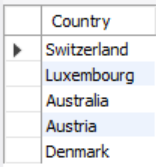

Here is my query for the lowest GDP:


```
SELECT Country
FROM (
    SELECT Country, AVG(GDP) AS AvgGDP
    FROM life_expectancy
    WHERE Year BETWEEN 2010 AND 2015
    GROUP BY Country
    ORDER BY AvgGDP ASC
    LIMIT 5
) AS LowestGDP;
```



And here is the resulting lowest 5 countries by GDP:

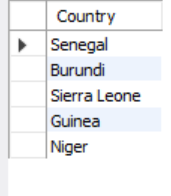

Here's the query I made for the top 5 countries by schooling:


```
SELECT Country
FROM (
    SELECT Country, AVG(Schooling) AS AvgSchooling
    FROM life_expectancy
    WHERE Year BETWEEN 2010 AND 2015
    GROUP BY Country
    ORDER BY AvgSchooling DESC
    LIMIT 5
) AS HighestSchooling
```



And the resulting countries:

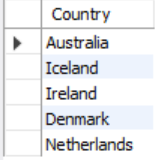

For the lowest countries by schooling, I used this query:


```
SELECT Country
FROM (
    SELECT Country, AVG(Schooling) AS AvgSchooling
    FROM life_expectancy
    WHERE Year BETWEEN 2010 AND 2015
    GROUP BY Country
    ORDER BY AvgSchooling ASC
    LIMIT 5
) AS LowestSchooling;
```



And here are the resulting countries:

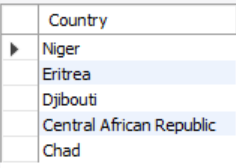

For countries with the highest alcohol consumption, I used this query:

```
SELECT Country
FROM (
    SELECT Country, AVG(Alcohol) AS AvgAlcohol
    FROM life_expectancy
    WHERE Year BETWEEN 2010 AND 2015
    GROUP BY Country
    ORDER BY AvgAlcohol DESC
    LIMIT 5
) AS HighestAlcohol
```



This is the resulting table:

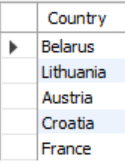

The query I used for the lowest alcohol consumption is:


```
SELECT Country
FROM (
    SELECT Country, AVG(Alcohol) AS AvgAlcohol
    FROM life_expectancy
    WHERE Year BETWEEN 2010 AND 2015
    GROUP BY Country
    ORDER BY AvgAlcohol ASC
    LIMIT 5
) AS LowestAlcohol;
```



And here are the countries returned:

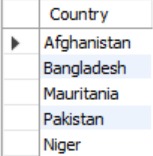

###Do densely populated countries tend to have lower life expectancy?
I don't really see a correlation between population and life expectancy, as there are still countries with the same life expectancy as the Maldives (the least populated) with over a million people (compared to the maldives 41 pop.)


# Part 2 (Python)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/bforoura/IDS/main/HW3/Life_Expectancy.csv"
life_expectancy_dataframe = pd.read_csv(url, sep=",")

In [3]:
life_expectancy_dataframe

,Country,Year,Life_Expectancy,Adult_Mortality,Alcohol,Percentage_Expenditure,BMI,Total_Expenditure,GDP,Population,Schooling
0,Afghanistan,2010,58.8,279.0,0.01,79.679367,16.7,9.20,553.328940,2883167.0,9.2
1,Afghanistan,2011,59.2,275.0,0.01,7.097109,17.2,7.87,63.537231,2978599.0,9.5
2,Afghanistan,2012,59.5,272.0,0.01,78.184215,17.6,8.52,669.959000,3696958.0,9.8
3,Afghanistan,2013,59.9,268.0,0.01,73.219243,18.1,8.13,631.744976,31731688.0,9.9
4,Afghanistan,2014,59.9,271.0,0.01,73.523582,18.6,8.18,612.696514,327582.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...
1103,Zimbabwe,2011,54.9,464.0,6.00,63.750530,29.9,6.31,839.927936,14386649.0,10.1
1104,Zimbabwe,2012,56.6,429.0,6.09,92.602336,3.3,6.69,955.648466,1471826.0,9.8
1105,Zimbabwe,2013,58.0,399.0,6.39,10.666707,3.8,6.88,111.227396,155456.0,10.4
1106,Zimbabwe,2014,59.2,371.0,6.50,10.822595,31.3,6.44,127.474620,15411675.0,10.3


In [8]:
life_expectancy_dataframe=life_expectancy_dataframe.dropna(subset=['Population'])

In [9]:
life_expectancy_dataframe['Alcohol']=life_expectancy_dataframe['Alcohol'].fillna(life_expectancy_dataframe['Alcohol'].mean())
life_expectancy_dataframe['Life_Expectancy ']=life_expectancy_dataframe['Life_Expectancy '].fillna(life_expectancy_dataframe['Life_Expectancy '].mean())
life_expectancy_dataframe['Adult_Mortality']=life_expectancy_dataframe['Adult_Mortality'].fillna(life_expectancy_dataframe['Adult_Mortality'].mean())
life_expectancy_dataframe[' BMI ']=life_expectancy_dataframe[' BMI '].fillna(life_expectancy_dataframe[' BMI '].mean())
life_expectancy_dataframe['Population']=life_expectancy_dataframe['Population'].fillna(life_expectancy_dataframe['Population'].mean())
life_expectancy_dataframe['Schooling']=life_expectancy_dataframe['Schooling'].fillna(life_expectancy_dataframe['Schooling'].mean())
life_expectancy_dataframe['Total_Expenditure']=life_expectancy_dataframe['Total_Expenditure'].fillna(life_expectancy_dataframe['Total_Expenditure'].mean())
life_expectancy_dataframe['GDP']=life_expectancy_dataframe['GDP'].fillna(life_expectancy_dataframe['GDP'].mean())
life_expectancy_dataframe['Percentage_Expenditure']=life_expectancy_dataframe['Percentage_Expenditure'].fillna(life_expectancy_dataframe['Percentage_Expenditure'].mean())

In [10]:
life_expectancy_dataframe

,Country,Year,Life_Expectancy,Adult_Mortality,Alcohol,Percentage_Expenditure,BMI,Total_Expenditure,GDP,Population,Schooling
0,Afghanistan,2010,58.8,279.0,0.010000,79.679367,16.7,9.200000,553.328940,2883167.0,9.2
1,Afghanistan,2011,59.2,275.0,0.010000,7.097109,17.2,7.870000,63.537231,2978599.0,9.5
2,Afghanistan,2012,59.5,272.0,0.010000,78.184215,17.6,8.520000,669.959000,3696958.0,9.8
3,Afghanistan,2013,59.9,268.0,0.010000,73.219243,18.1,8.130000,631.744976,31731688.0,9.9
4,Afghanistan,2014,59.9,271.0,0.010000,73.523582,18.6,8.180000,612.696514,327582.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...
1103,Zimbabwe,2011,54.9,464.0,6.000000,63.750530,29.9,6.310000,839.927936,14386649.0,10.1
1104,Zimbabwe,2012,56.6,429.0,6.090000,92.602336,3.3,6.690000,955.648466,1471826.0,9.8
1105,Zimbabwe,2013,58.0,399.0,6.390000,10.666707,3.8,6.880000,111.227396,155456.0,10.4
1106,Zimbabwe,2014,59.2,371.0,6.500000,10.822595,31.3,6.440000,127.474620,15411675.0,10.3


Correlation between Life Expectancy and Adult Mortality rates:

In [11]:
life_expectancy_dataframe['Adult_Mortality'].corr(life_expectancy_dataframe['Life_Expectancy '])

-0.7577240572194948

Correlation between life expectancy and eating habits:

In [12]:
life_expectancy_dataframe[' BMI '].corr(life_expectancy_dataframe['Life_Expectancy '])

0.5072059132404372

Correlation between life expectancy and drinking alcohol:

In [13]:
life_expectancy_dataframe['Alcohol'].corr(life_expectancy_dataframe['Life_Expectancy '])

0.4168096974738373

Correlation between life expectancy and social factors:

In [18]:
life_expectancy_dataframe['Population'].corr(life_expectancy_dataframe['Life_Expectancy '])

-0.030389257078716116

Correlation between economic factors and life expectancy:

In [14]:
life_expectancy_dataframe['GDP'].corr(life_expectancy_dataframe['Life_Expectancy '])

0.4314607663985747

In [16]:
life_expectancy_dataframe['Percentage_Expenditure'].corr(life_expectancy_dataframe['Life_Expectancy '])

0.3618972496524763

In [17]:
life_expectancy_dataframe['Total_Expenditure'].corr(life_expectancy_dataframe['Life_Expectancy '])

0.21846397259368808

Impact of schooling on lifespan:

In [19]:
life_expectancy_dataframe['Schooling'].corr(life_expectancy_dataframe['Life_Expectancy '])

0.7449107341242504

Scatter plot for the top three highest correlated independent variables: BMI, GDP, and Schooling.

<Axes: xlabel=' BMI ', ylabel='Life_Expectancy '>

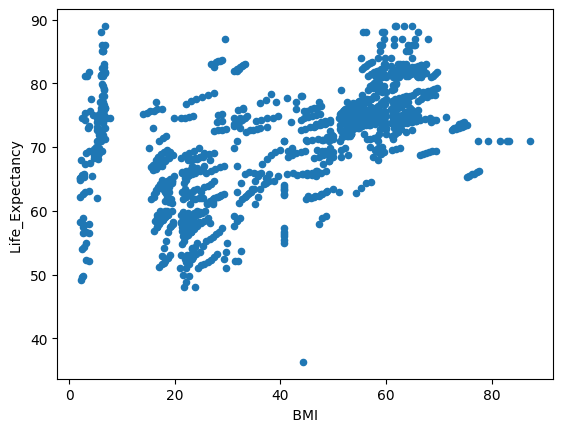

In [31]:
life_expectancy_dataframe.plot.scatter(x=' BMI ', y='Life_Expectancy ')

Linear Regression for BMI

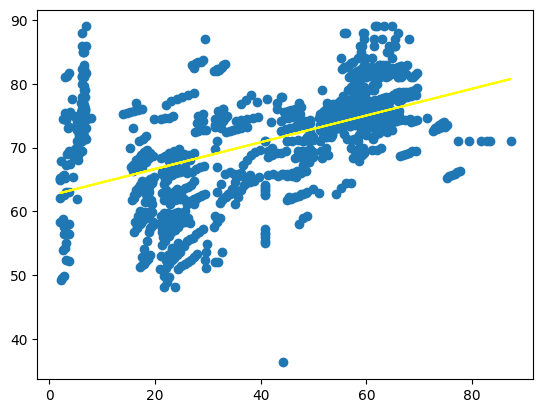

In [28]:
from sklearn.linear_model import LinearRegression
Life_Expectancy = life_expectancy_dataframe[['Life_Expectancy ']]
BMI = life_expectancy_dataframe[[' BMI ']]
bmilingreg = LinearRegression()
bmilingreg.fit(BMI,Life_Expectancy)
bmi_prediction = bmilingreg.predict(BMI)

plt.scatter(BMI, Life_Expectancy)
plt.plot(BMI, bmi_prediction, color='yellow')
plt.show()

Linear Regression for GDP

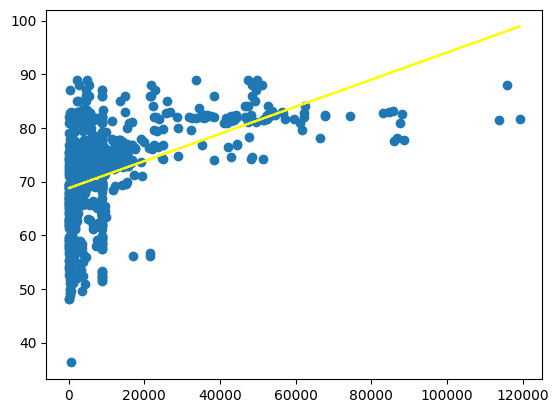

In [29]:
Life_Expectancy = life_expectancy_dataframe[['Life_Expectancy ']]
GDP = life_expectancy_dataframe[['GDP']]
GDPlingreg = LinearRegression()
GDPlingreg.fit(GDP,Life_Expectancy)
GDP_prediction = GDPlingreg.predict(GDP)

plt.scatter(GDP, Life_Expectancy)
plt.plot(GDP, GDP_prediction, color='yellow')
plt.show()

Schooling Linear Regression

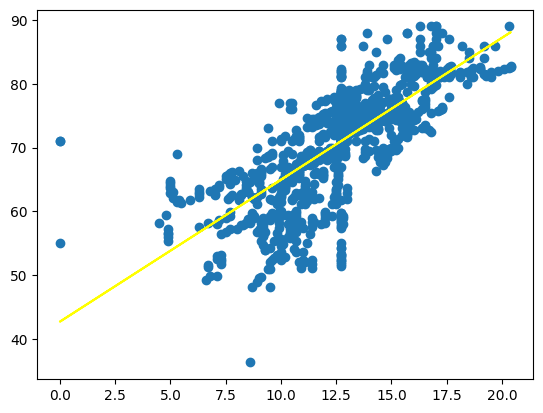

In [30]:
Life_Expectancy = life_expectancy_dataframe[['Life_Expectancy ']]
Schooling = life_expectancy_dataframe[['Schooling']]
Schoolinglingreg = LinearRegression()
Schoolinglingreg.fit(Schooling,Life_Expectancy)
Schooling_prediction = Schoolinglingreg.predict(Schooling)

plt.scatter(Schooling, Life_Expectancy)
plt.plot(Schooling, Schooling_prediction, color='yellow')
plt.show()

Equation of BMI Line:

In [36]:
print("y = ", bmilingreg.coef_ , "x + " , bmilingreg.intercept_)

y =  [[0.2098436]] x +  [62.45320279]


Equation of GDP Line:

In [38]:
print("y = ", GDPlingreg.coef_ , "x + " , GDPlingreg.intercept_)

y =  [[0.00025287]] x +  [68.77380625]


Equation of Schooling Line:

In [39]:
print("y = ", Schoolinglingreg.coef_ , "x + " , Schoolinglingreg.intercept_)

y =  [[2.22611884]] x +  [42.70108059]


BMI, GDP, and Schooling MSE and R2 Values:

In [40]:
schoolingmser2 = Schoolinglingreg.predict(life_expectancy_dataframe[['Schooling']])
BMImser2 = bmilingreg.predict(life_expectancy_dataframe[[' BMI ']])
GDPmser2 = GDPlingreg.predict(life_expectancy_dataframe[['GDP']])

In [42]:
from sklearn.metrics import mean_squared_error, r2_score
print("BMI MSE: ", mean_squared_error(life_expectancy_dataframe[['Life_Expectancy ']], BMImser2))
print("BMI R2: ", r2_score(life_expectancy_dataframe[['Life_Expectancy ']], BMImser2))

print("GDP MSE: ", mean_squared_error(life_expectancy_dataframe[['Life_Expectancy ']], GDPmser2))
print("GDP R2: ", r2_score(life_expectancy_dataframe[['Life_Expectancy ']], GDPmser2))

print("Schooling MSE: ", mean_squared_error(life_expectancy_dataframe[['Life_Expectancy ']], schoolingmser2))
print("Schooling R2: ", r2_score(life_expectancy_dataframe[['Life_Expectancy ']], schoolingmser2))

Schooling MSE:  32.99983591342573
Schooling R2:  0.5548920018135295
BMI MSE:  55.066117791158526
BMI R2:  0.25725783842606587
GDP MSE:  60.33735543257178
GDP R2:  0.1861583929412456


In my investigation, I found out that the top 3 correlations are BMI, GDP, and Schooling.
Schooling, by far, performs the best as it's MSE and R2 values are the highest